# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# importing databases
Sinasc_RO_2019 = pd.read_csv('SINASC_RO_2019 V2.csv', sep=',')

df_Sinasc_RO_2019 = pd.DataFrame(Sinasc_RO_2019)

df_Sinasc_RO_2019.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
#veryfing APGAR5 data
df_Sinasc_RO_2019.value_counts('APGAR5')

APGAR5
9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
dtype: int64

In [5]:
#Categorizing APGAR5 creating a new column 'CATAPGAR5'.

df_Sinasc_RO_2019.loc[df_Sinasc_RO_2019['APGAR5']>=8, 'CATAPGAR5'] = 'normal'
df_Sinasc_RO_2019.loc[(df_Sinasc_RO_2019['APGAR5']>=6) & (df_Sinasc_RO_2019['APGAR5']<=7), 'CATAPGAR5'] = 'asfixia leve'
df_Sinasc_RO_2019.loc[(df_Sinasc_RO_2019['APGAR5']>=4) & (df_Sinasc_RO_2019['APGAR5']<=5), 'CATAPGAR5'] = 'asfixia moderada'
df_Sinasc_RO_2019.loc[(df_Sinasc_RO_2019['APGAR5']>=0) & (df_Sinasc_RO_2019['APGAR5']<=3), 'CATAPGAR5'] = 'asfixia grave'

df_Sinasc_RO_2019.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,CATAPGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [6]:
#Veryfing informations inside 'GESTACAO'
df_Sinasc_RO_2019.value_counts('GESTACAO')

GESTACAO
37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
dtype: int64

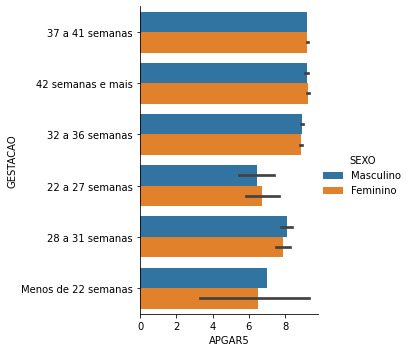

In [7]:
#Graphics correlactioning 'APGAR5' by 'SEXO' for 'GESTACAO' group
sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind = 'bar'
            ,data= df_Sinasc_RO_2019
            )
#As we can see, the time of 'GESTACAO' have a high influence in the 'APGAR5'.

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [8]:
df_APGAR5_por_tempo_de_GESTACAO = pd.pivot_table(df_Sinasc_RO_2019, index=['GESTACAO'], values=['APGAR5'])
df_APGAR5_por_tempo_de_GESTACAO

,APGAR5
GESTACAO,
22 a 27 semanas,6.623529
28 a 31 semanas,7.987654
32 a 36 semanas,8.908684
37 a 41 semanas,9.224437
42 semanas e mais,9.219198
Menos de 22 semanas,6.571429


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
# The pivot table above, by default, already take the medium values.
df_APGAR5_por_tempo_de_GESTACAO

,APGAR5
GESTACAO,
22 a 27 semanas,6.623529
28 a 31 semanas,7.987654
32 a 36 semanas,8.908684
37 a 41 semanas,9.224437
42 semanas e mais,9.219198
Menos de 22 semanas,6.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

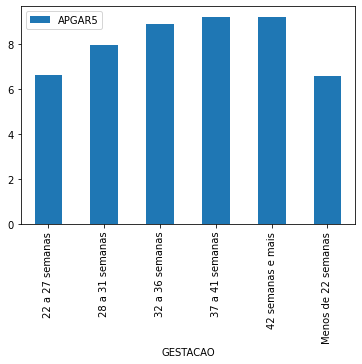

In [10]:
df_APGAR5_por_tempo_de_GESTACAO.plot.bar()

# Resposta 6: 
Podemos ver que as Gestações de '37 a 41 semanas' e '42 semanas e mais' tem uma média de APGAR5 maior que 9. 
Para os casos de 32 a 36 semanas, o APGAR5 médio é 8.9 o que é consideravelmente bom.
Para o casos de Gestação abaixo de 27 semanas o APGAR5 cai muito, abaixo de 6.6.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

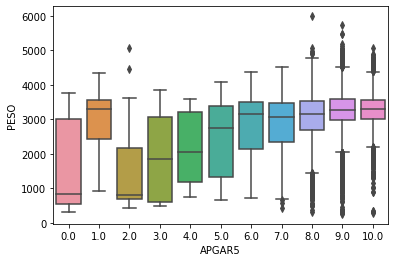

In [16]:
sns.boxplot(x = 'APGAR5'
            , y = 'PESO'
            , data = df_Sinasc_RO_2019
            )

#Resposta 7
Com base no gráfico acima, vemos que conforme a nota de 'APGAR5' vai crescendo, a médiana de peso também sobe. 
Além disso, quanto maior o 'APGAR5' menor a variação de peso entre o primeiro e o terceiro quartil. 

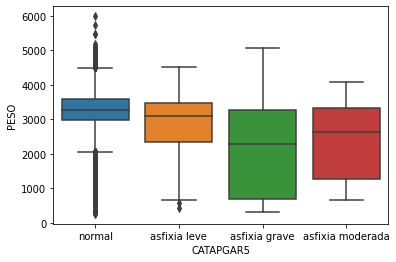

In [17]:
sns.boxplot(x = 'CATAPGAR5'
            , y = 'PESO'
            , data = df_Sinasc_RO_2019
            )

# Resposta 7 - continuação da resposta
Para melhorar a visualização, coloquei também um gráfico com base na categoria do APGAR5, entendo que facilita a visualização, nela fica mais claro a menor variação de peso, das bebês tidos como 'normal', além de uma mediana mais alta. Quando a asfixia é considerada 'grave', vemos a mediana mais baixa, e uma variação maior entre o primeiro e o terceiro quartil.